Размер датасета: (119885, 28)
Типы данных:
order_id                               int64
order_time                    datetime64[ns]
analytical_customer_id                object
is_acquisition                          bool
is_successful                           bool
reason                                object
sub_reason                            object
owner                                 object
delivery_arrangement                  object
gmv_amount_lc                        float64
basket_amount_lc                     float64
delivery_fee_amount_lc               float64
Payment Method                        object
actual_delivery_time                 float64
promised_delivery_time               float64
order_delay                          float64
dropoff_distance_manhattan           float64
platform                              object
vertical_class                        object
vertical                              object
is_affordable_freedelivery              bool
is_affordabl

<ipython-input-3-de22dd35f11a>:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


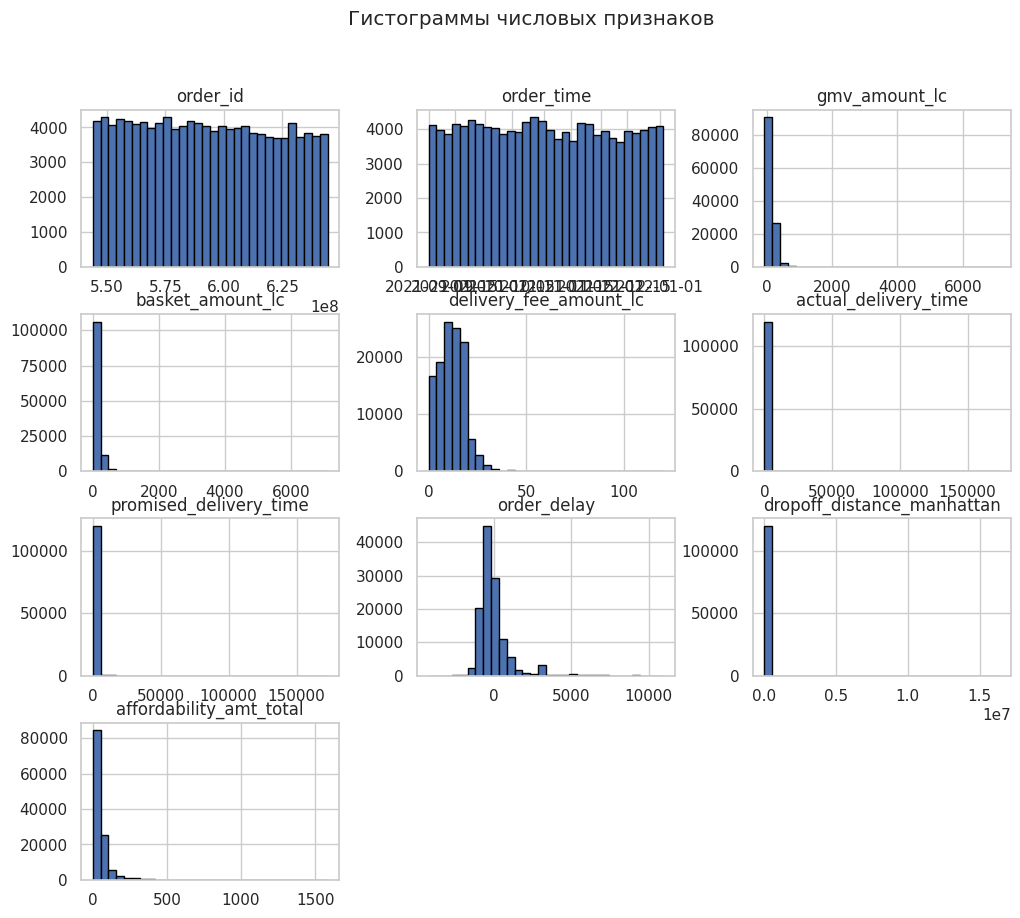

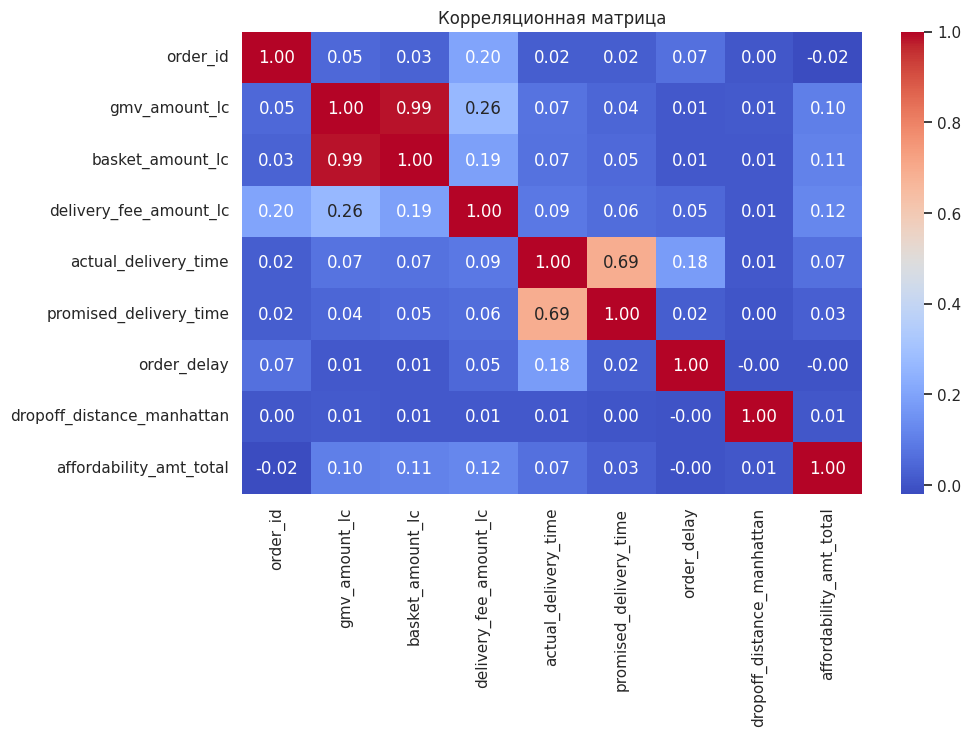

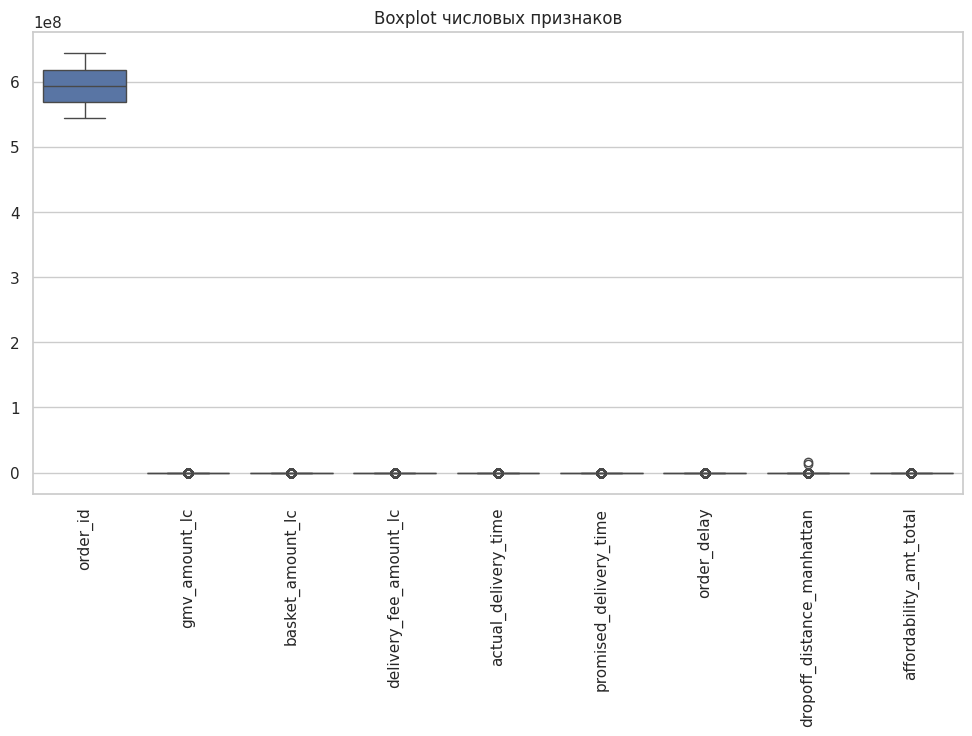

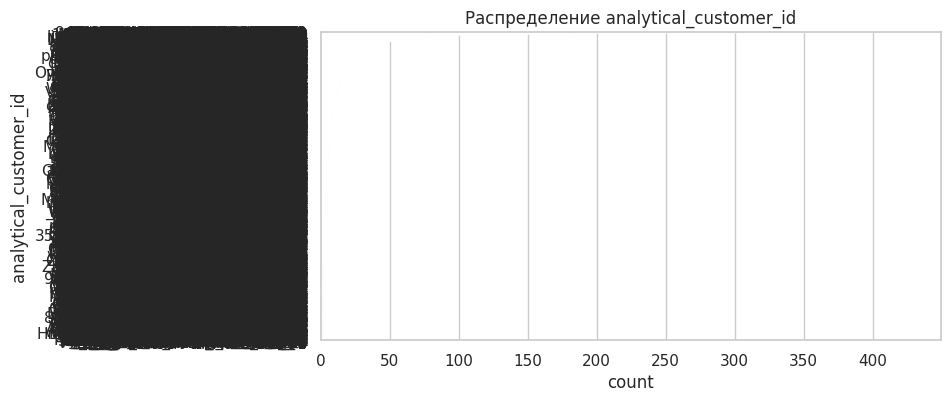

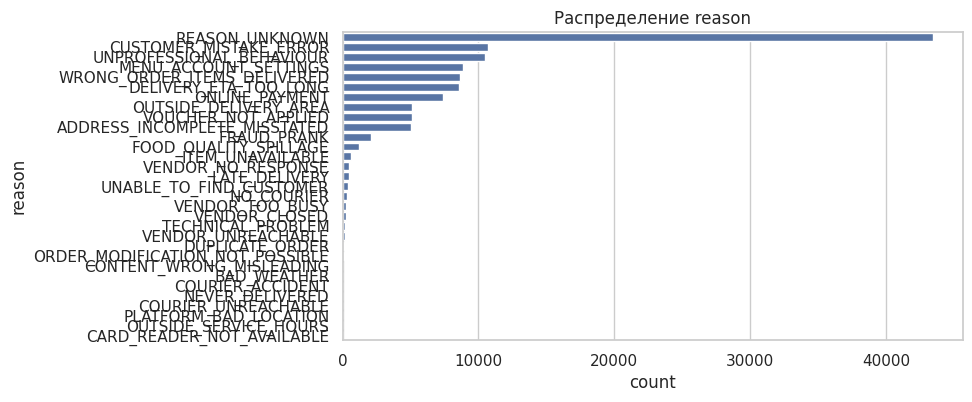

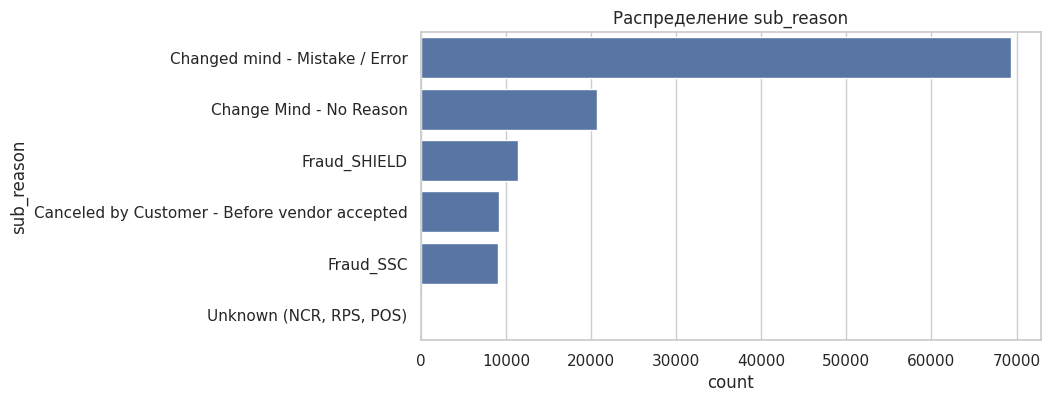

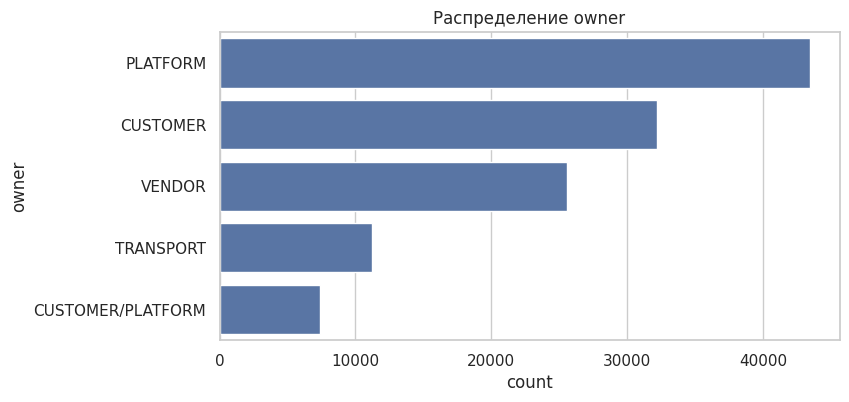

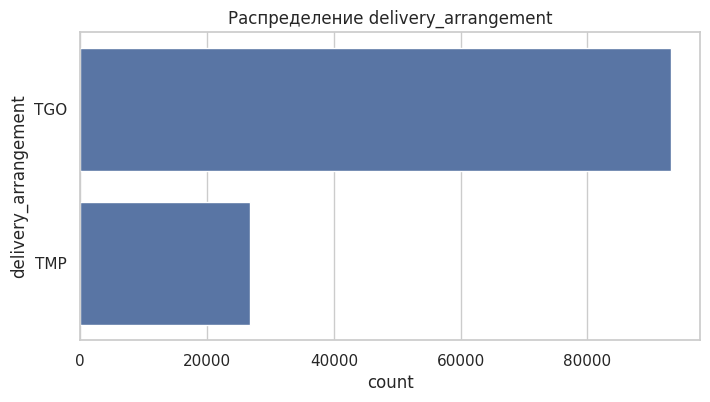

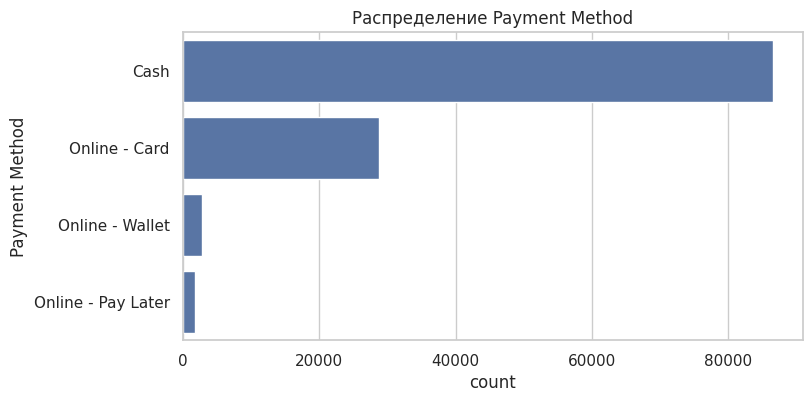

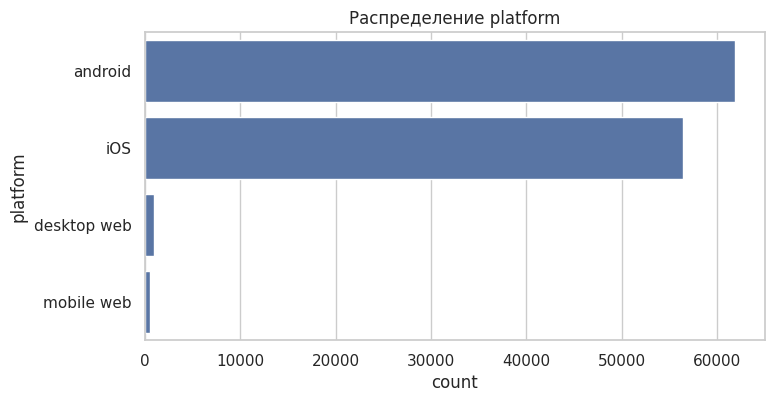

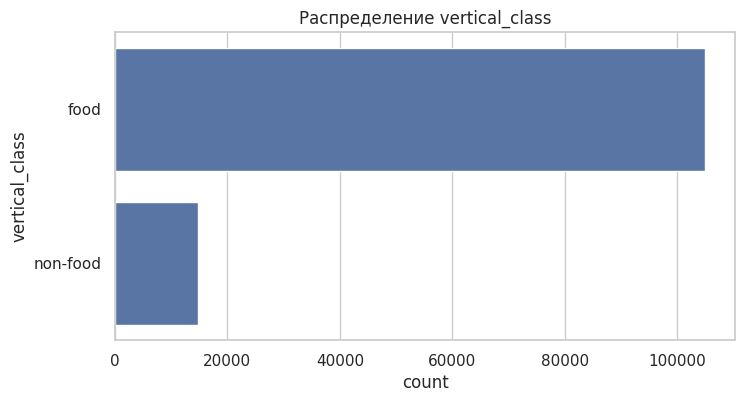

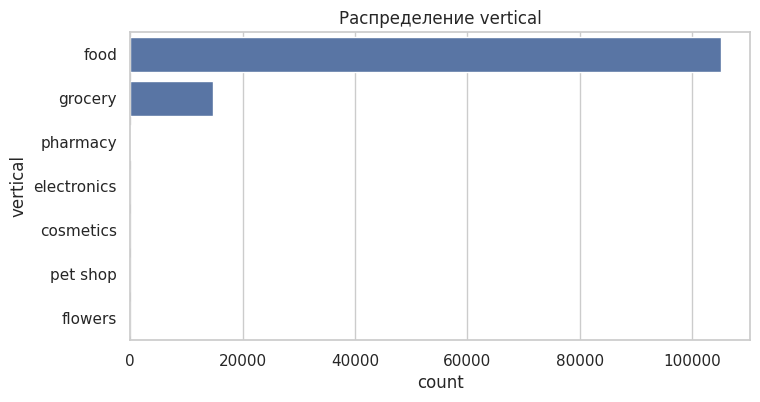

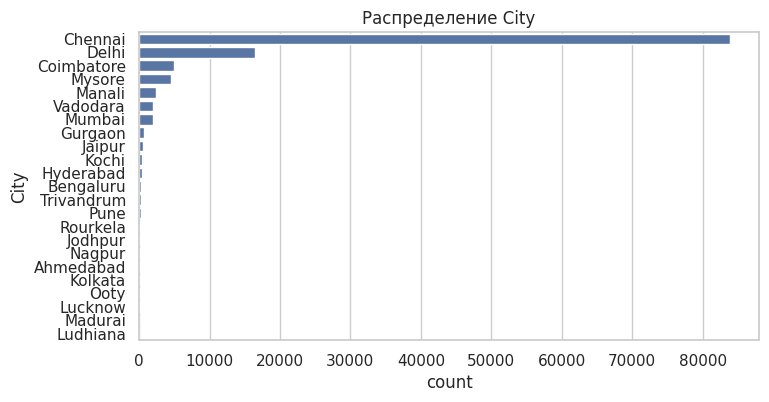

Предобработка завершена. Данные готовы для витрин моделей.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Указываем путь к загруженному файлу
file_path = '/content/Zomato mock data.xlsx'

# Загружаем данные из файла (предполагая, что первый лист содержит данные)
xls = pd.ExcelFile(file_path)
df = xls.parse(xls.sheet_names[0])

# Первичный анализ данных
print("Размер датасета:", df.shape)
print("Типы данных:")
print(df.dtypes)
print("Пропущенные значения:")
print(df.isnull().sum())
print("Обзор данных:")
print(df.head())

# Удалим дубликаты
df.drop_duplicates(inplace=True)

# Заполним пропущенные значения (если есть)
df.fillna(method='ffill', inplace=True)

# Построим графики
sns.set(style='whitegrid')

# Распределение числовых признаков
df.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle('Гистограммы числовых признаков')
plt.show()

# Корреляционная матрица
# Select only numeric columns for correlation calculation
numerical_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица')
plt.show()

# Boxplot для выявления выбросов
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=['number']))
plt.xticks(rotation=90)
plt.title('Boxplot числовых признаков')
plt.show()

# Категориальные признаки
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Распределение {col}')
    plt.show()

print("Предобработка завершена. Данные готовы для витрин моделей.")